In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import os

In [2]:
torch.manual_seed(777)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
IMAGE_SIZE = 128

In [3]:
car_image_root = r'C:\Users\dhdms\OneDrive\바탕 화면\K디지털\9.AI\car\car_ori'

original_datasets = ImageFolder(
    root=car_image_root,
    transform=transforms.Compose([
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.ToTensor()
    ])
)

In [4]:
print("원본 데이터셋 정보: ", original_datasets)
print("클래스 목록:", original_datasets.classes)
print("클래스 수:", len(original_datasets.classes))

원본 데이터셋 정보:  Dataset ImageFolder
    Number of datapoints: 9900
    Root location: C:\Users\dhdms\OneDrive\바탕 화면\K디지털\9.AI\car\car_ori
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
클래스 목록: ['AVANTE', 'CASPER', 'EV6', 'G70', 'GRANDEUR', 'GV60', 'IONIQ5', 'IONIQ6', 'K5', 'K8', 'K9', 'KONA', 'Korando', 'Morning', 'NEXO', 'NiroEV', 'PALISADE', 'Ray', 'Rexton', 'SANTAFE', 'SONATA', 'STARIA', 'Seltos', 'Sorento', 'Sportage', 'Stinger', 'TUCSON', 'Tivoli', 'Torres', 'VENUE', 'qm6', 'sm6', 'xm3']
클래스 수: 33


In [5]:
original_loader = DataLoader(original_datasets,
                             batch_size=2313, 
                             shuffle=True,
                             drop_last=False,
                             num_workers=1)

In [6]:
for X, Y in original_loader:
    print("X size:", X.size(), "Y size:", Y.size())
    print("레이블 값:", Y)
    break

X size: torch.Size([2313, 3, 128, 128]) Y size: torch.Size([2313])
레이블 값: tensor([17, 24,  7,  ..., 25, 23,  7])


In [7]:
original_images, labels = next(iter(original_loader))
print("original_images.shape:", original_images.shape)
print("labels.shape:", labels.shape)
print("처음 10개의 라벨:", labels[:10])

original_images.shape: torch.Size([2313, 3, 128, 128])
labels.shape: torch.Size([2313])
처음 10개의 라벨: tensor([32, 26, 17,  0, 15,  1,  3, 11, 28, 27])


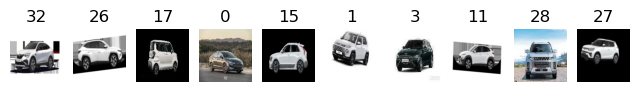

In [8]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
plt.figure(figsize=(8, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(labels[i].item())
    # permute(1,2,0)은 (C,H,W) -> (H,W,C)로 차원 변경
    plt.imshow(original_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [9]:
Image_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

transforms_datasets = ImageFolder(
    root=car_image_root,
    transform=Image_transform
)

transforms_loader = DataLoader(
    transforms_datasets,
    batch_size=100,
    shuffle=False,
    num_workers=1
)

In [10]:
transforms_images, transforms_labels = next(iter(transforms_loader))
print("transforms_images.shape:", transforms_images.shape)
print("transforms_labels.shape:", transforms_labels.shape)

transforms_images.shape: torch.Size([100, 3, 128, 128])
transforms_labels.shape: torch.Size([100])


In [11]:
none_datasets = ImageFolder(
    root=car_image_root,
    transform=transforms.Compose([
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.ToTensor()
    ])
)

none_loader = DataLoader(
    none_datasets,
    batch_size=100,
    shuffle=False,
    num_workers=1
)

print("none_datasets 이미지 개수:", len(none_datasets))

none_datasets 이미지 개수: 9900
